In [1]:
from datetime import datetime


timer_intial = datetime.now()

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
import re
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sujau\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 1. Data Extraction

### 1.1 Setting up folder and file name

In [2]:
f_path = '../datasets/Stack Overflow/'
train = 'Train.csv'
test = 'Test.csv'

### 1.2 Read data from CSV files

In [3]:
train_Stk_Ovrfl_df = pd.read_csv(f_path+train, sep=',', encoding='latin-1')
train_Stk_Ovrfl_df.head()

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents


In [4]:
# test_Stk_Ovrfl_df = pd.read_csv(f_path+test, sep=',', encoding='latin-1')
# test_Stk_Ovrfl_df.head()

In [5]:
train_Stk_Ovrfl_df_0_15_M = train_Stk_Ovrfl_df.head(75000)
train_Stk_Ovrfl_df_0_15_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      75000 non-null  int64 
 1   Title   75000 non-null  object
 2   Body    75000 non-null  object
 3   Tags    75000 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
train_Stk_Ovrfl_df_0_15_M.describe()

,Id
count,75000.000000
mean,37500.500000
std,21650.779432
min,1.000000
25%,18750.750000
50%,37500.500000
75%,56250.250000
max,75000.000000


# 2. Data Wrangling

### 2.1 Removing HTML tags

In [7]:
def html_cleanser(body):
    #body = BeautifulSoup(questions_df['Body'][0], 'html.parser').replace('\n','')
    soup = BeautifulSoup(body, 'html.parser')
    soup = soup.text.replace('\n', '')
    #soup = soup.text.replace('<p>', '')
    return soup


In [8]:
timer = datetime.now()

train_Stk_Ovrfl_df_0_15_M['Body_Cleansed'] = train_Stk_Ovrfl_df_0_15_M['Body'].apply(html_cleanser)

print("Time taken: ", datetime.now() - timer)
train_Stk_Ovrfl_df_0_15_M.head(10)

Time taken:  0:00:20.216076


<ipython-input-8-108cd91e5bf4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_Stk_Ovrfl_df_0_15_M['Body_Cleansed'] = train_Stk_Ovrfl_df_0_15_M['Body'].apply(html_cleanser)


,Id,Title,Body,Tags,Body_Cleansed
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,I'd like to check if an uploaded file is an im...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,"In my favorite editor (vim), I regularly use c..."
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,I am import matlab file and construct a data f...
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,"This is probably very simple, but I simply can..."
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents,function modify(.......){ $mcontact = file_ge...
5,6,setting proxy in active directory environment,<p>I am using a machine on which active direct...,proxy active-directory jmeter,I am using a machine on which active directory...
6,7,How to draw barplot in this way with Coreplot,<p>My image is cannot post so the link is my ...,core-plot,My image is cannot post so the link is my pic...
7,8,How to fetch an XML feed using asp.net,<p>I've decided to convert a Windows Phone 7 a...,c# asp.net windows-phone-7,I've decided to convert a Windows Phone 7 app ...
8,9,.NET library for generating javascript?,<p>Do you know of a .NET library for generatin...,.net javascript code-generation,Do you know of a .NET library for generating j...
9,10,"SQL Server : procedure call, inline concatenat...",<p>I'm using SQL Server 2008 R2 and was wonder...,sql variables parameters procedure calls,I'm using SQL Server 2008 R2 and was wondering...


In [9]:
del train_Stk_Ovrfl_df_0_15_M['Body']
train_Stk_Ovrfl_df_0_15_M.rename(columns={"Body_Cleansed": "Body"}, inplace = True)

C:\Users\sujau\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### 2.2 Checking NULL values

In [10]:
train_Stk_Ovrfl_df_0_15_M.isnull().sum()

Id       0
Title    0
Tags     0
Body     0
dtype: int64

In [11]:
train_Stk_Ovrfl_df_0_15_M1 = train_Stk_Ovrfl_df_0_15_M.dropna()
train_Stk_Ovrfl_df_0_15_M1.isnull().sum()

Id       0
Title    0
Tags     0
Body     0
dtype: int64

In [12]:
train_Stk_Ovrfl_df_0_15_M1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75000 entries, 0 to 74999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      75000 non-null  int64 
 1   Title   75000 non-null  object
 2   Tags    75000 non-null  object
 3   Body    75000 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [13]:
train_Stk_Ovrfl_df_0_15_M = train_Stk_Ovrfl_df_0_15_M1

### 2.3 Removing Emojis

In [14]:
def deEmojify(body):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',body)

In [15]:
timer = datetime.now()

train_Stk_Ovrfl_df_0_15_M['Body_No_Emoji'] = train_Stk_Ovrfl_df_0_15_M['Body'].apply(deEmojify)


print("Time taken: ", datetime.now() - timer)
train_Stk_Ovrfl_df_0_15_M.head(10)

Time taken:  0:00:01.069247


,Id,Title,Tags,Body,Body_No_Emoji
0,1,How to check if an uploaded file is an image w...,php image-processing file-upload upload mime-t...,I'd like to check if an uploaded file is an im...,I'd like to check if an uploaded file is an im...
1,2,How can I prevent firefox from closing when I ...,firefox,"In my favorite editor (vim), I regularly use c...","In my favorite editor (vim), I regularly use c..."
2,3,R Error Invalid type (list) for variable,r matlab machine-learning,I am import matlab file and construct a data f...,I am import matlab file and construct a data f...
3,4,How do I replace special characters in a URL?,c# url encoding,"This is probably very simple, but I simply can...","This is probably very simple, but I simply can..."
4,5,How to modify whois contact details?,php api file-get-contents,function modify(.......){ $mcontact = file_ge...,function modify(.......){ $mcontact = file_ge...
5,6,setting proxy in active directory environment,proxy active-directory jmeter,I am using a machine on which active directory...,I am using a machine on which active directory...
6,7,How to draw barplot in this way with Coreplot,core-plot,My image is cannot post so the link is my pic...,My image is cannot post so the link is my pic...
7,8,How to fetch an XML feed using asp.net,c# asp.net windows-phone-7,I've decided to convert a Windows Phone 7 app ...,I've decided to convert a Windows Phone 7 app ...
8,9,.NET library for generating javascript?,.net javascript code-generation,Do you know of a .NET library for generating j...,Do you know of a .NET library for generating j...
9,10,"SQL Server : procedure call, inline concatenat...",sql variables parameters procedure calls,I'm using SQL Server 2008 R2 and was wondering...,I'm using SQL Server 2008 R2 and was wondering...


In [16]:
del train_Stk_Ovrfl_df_0_15_M['Body']
train_Stk_Ovrfl_df_0_15_M.rename(columns={"Body_No_Emoji": "Body"}, inplace = True)
train_Stk_Ovrfl_df_0_15_M.head()

,Id,Title,Tags,Body
0,1,How to check if an uploaded file is an image w...,php image-processing file-upload upload mime-t...,I'd like to check if an uploaded file is an im...
1,2,How can I prevent firefox from closing when I ...,firefox,"In my favorite editor (vim), I regularly use c..."
2,3,R Error Invalid type (list) for variable,r matlab machine-learning,I am import matlab file and construct a data f...
3,4,How do I replace special characters in a URL?,c# url encoding,"This is probably very simple, but I simply can..."
4,5,How to modify whois contact details?,php api file-get-contents,function modify(.......){ $mcontact = file_ge...


### 2.3 Checking for duplicates

In [17]:
# train_Stk_Ovrfl_df.drop_duplicates()
# train_Stk_Ovrfl_df.info()

In [18]:
# train_Stk_Ovrfl_df_sample['Count_for_Duplicates'] = train_Stk_Ovrfl_df_sample.groupby([['Id','Title','Body']]).count()
# train_Stk_Ovrfl_df_sample

#dup_train_Stk_Ovrfl_df = train_Stk_Ovrfl_df[train_Stk_Ovrfl_df.duplicated()]
#dup_train_Stk_Ovrfl_df.info()

### 2.4 Label Analysis

In [19]:
timer = datetime.now()

train_Stk_Ovrfl_df_0_15_M["tag_count"] = train_Stk_Ovrfl_df_0_15_M["Tags"].apply(lambda x: len(x.split(" ")))
train_Stk_Ovrfl_df_0_15_M.head()

print("Time taken: ", datetime.now() - timer)

Time taken:  0:00:00.038006


In [20]:
text = u'This is a smiley face \U0001f602'
print(text) 

This is a smiley face 😂


In [21]:
#tag_new_df = stackoverflow_df[['Id','Tag']]
#tag_count_df = tag_new_df.groupby('Tag').count().reset_index().sort_values(by='Id', ascending=False)
#tag_count_df.rename(columns={"Id": "Tag_Count"}, inplace = True)

In [22]:
countwise_tag_count = train_Stk_Ovrfl_df_0_15_M.groupby('tag_count').count()

In [23]:
countwise_tag_count = countwise_tag_count.reset_index()

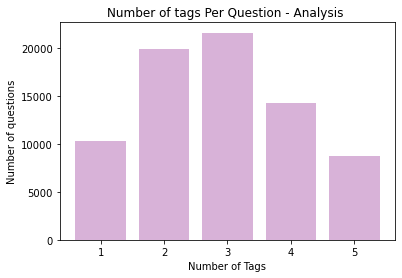

In [24]:
plt.bar(countwise_tag_count['tag_count'],countwise_tag_count['Tags'], color='purple', alpha=.3)
plt.title("Number of tags Per Question - Analysis ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

In [25]:
countwise_tag_count['tag_count']

0    1
1    2
2    3
3    4
4    5
Name: tag_count, dtype: int64

#### 2.4.2 Frequent Tag Analysis

In [26]:
train_tag_df = pd.DataFrame(train_Stk_Ovrfl_df_0_15_M.Tags.str.split(' ').tolist(), index=train_Stk_Ovrfl_df_0_15_M.Id).stack()
train_tag_df = train_tag_df.reset_index([0, 'Id'])
train_tag_df.columns = ['Id', 'Tag']
train_tag_df.head()

,Id,Tag
0,1,php
1,1,image-processing
2,1,file-upload
3,1,upload
4,1,mime-types


In [27]:
train_tag_df.head(20)

,Id,Tag
0,1,php
1,1,image-processing
2,1,file-upload
3,1,upload
4,1,mime-types
5,2,firefox
6,3,r
7,3,matlab
8,3,machine-learning
9,4,c#


In [28]:
tag_count = train_tag_df.groupby('Tag').count()
tag_count = tag_count.reset_index()
tag_count.rename(columns={"Id": "Count"}, inplace = True)
tag_count.head()

,Tag,Count
0,.a,1
1,.bash-profile,1
2,.class-file,1
3,.each,6
4,.emf,2


In [29]:
tag_count.sort_values(by=['Count'], inplace=True, ascending=False)
tag_count.head(10)

,Tag,Count
1813,c#,5808
7185,java,5143
10640,php,4898
7225,javascript,4596
517,android,4023
7411,jquery,3692
1820,c++,2475
7028,iphone,2316
11352,python,2313
944,asp.net,2187


<Figure size 1800x1440 with 0 Axes>

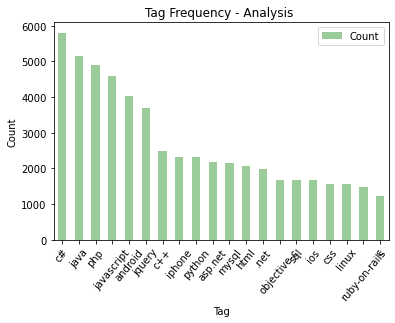

In [30]:
plt.figure(figsize=(25,20))
"""plt.bar(tag_count['Tag'],tag_count['Count'])
plt.title("Tag Frequency - Analysis ")
plt.xlabel("Tags")
plt.ylabel("Frequency")
plt.show()
"""
tag_count.head(20).plot.bar(x='Tag', y='Count',color='green', alpha=.4)
plt.title("Tag Frequency - Analysis ")
plt.xticks(rotation=50)
#plt.xticks(tag_count_df.index,tag_sample_df["Tag"].values)
plt.xlabel("Tag")
plt.ylabel("Count")
plt.show()

In [31]:
tag_string = ''
def tag_maker(tag):
    tag_string = ' '+tag
    return tag_string

tag_string = train_tag_df.Tag.apply(tag_maker)
print(len(tag_string))
tag_string

216332


0                       php
1          image-processing
2               file-upload
3                    upload
4                mime-types
                ...        
216327            sprockets
216328                  mac
216329           hard-drive
216330               repair
216331          replacement
Name: Tag, Length: 216332, dtype: object

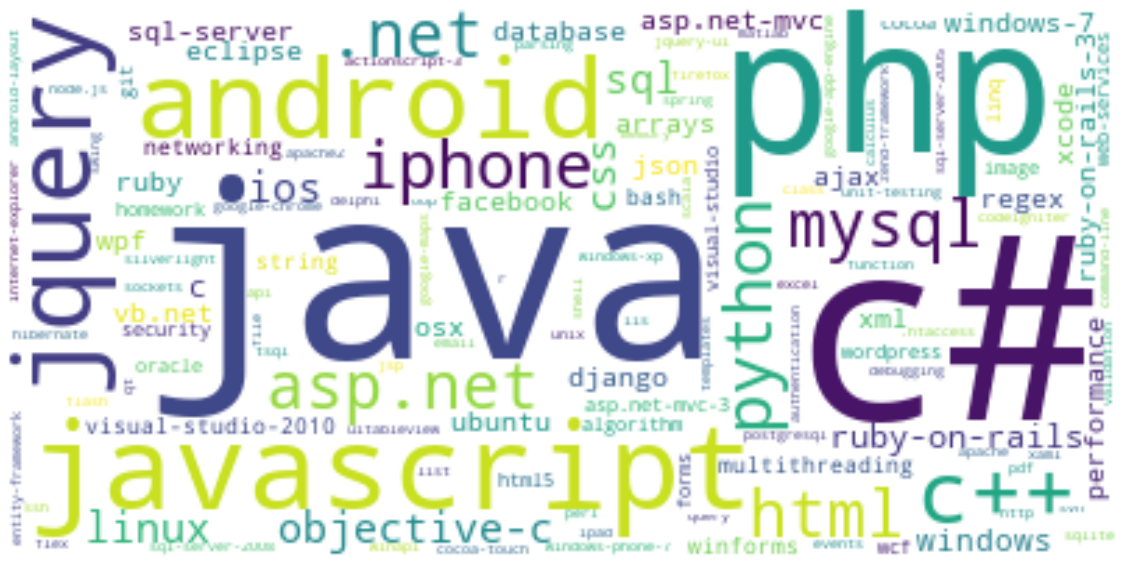

In [32]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Create and generate a word cloud image:
tag_count_wc = dict(zip(tag_count['Tag'], tag_count['Count']))
tag_count_wc = dict(tag_count_wc.items())
wordcloud = WordCloud(background_color="white").generate_from_frequencies(tag_count_wc)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
pd.DataFrame(train_tag_df.Tag.unique()).count()

0    16488
dtype: int64

In [34]:
tag_count.sort_values(by=['Count'], inplace=True, ascending=False)

In [35]:
tag_count.head(10)

,Tag,Count
1813,c#,5808
7185,java,5143
10640,php,4898
7225,javascript,4596
517,android,4023
7411,jquery,3692
1820,c++,2475
7028,iphone,2316
11352,python,2313
944,asp.net,2187


(0.0, 60.0)

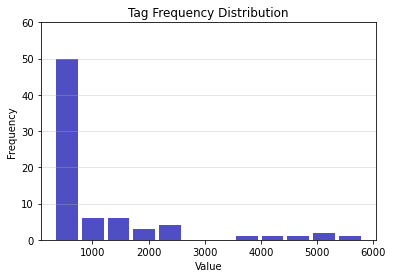

In [36]:
n, bins, patches = plt.hist(x=tag_count['Count'].head(75), bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.4)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Tag Frequency Distribution')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

# 3. Natural Language Processing

### 3.1 Feature Engineering

In [37]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")
volume_initializer = 3 # VOlume initializer to set size based on computing resource.

In [38]:
# train_Stk_Ovrfl_df_0_15_M = train_Stk_Ovrfl_df.head(150000)
train_Stk_Ovrfl_df_0_15_M.head()

,Id,Title,Tags,Body,tag_count
0,1,How to check if an uploaded file is an image w...,php image-processing file-upload upload mime-t...,I'd like to check if an uploaded file is an im...,5
1,2,How can I prevent firefox from closing when I ...,firefox,"In my favorite editor (vim), I regularly use c...",1
2,3,R Error Invalid type (list) for variable,r matlab machine-learning,I am import matlab file and construct a data f...,3
3,4,How do I replace special characters in a URL?,c# url encoding,"This is probably very simple, but I simply can...",3
4,5,How to modify whois contact details?,php api file-get-contents,function modify(.......){ $mcontact = file_ge...,3


### 3.2 Encoding

In [39]:
timer = datetime.now()
train_Stk_Ovrfl_df_0_15_M['Title_Enc']=train_Stk_Ovrfl_df_0_15_M['Title'].apply(lambda a : str(a.encode('utf-8')))
#train_Stk_Ovrfl_df_100K.map_partitions(lambda x : str(x.encode('utf-8'))
print("Time taken: ", datetime.now() - timer)
train_Stk_Ovrfl_df_0_15_M.head()

Time taken:  0:00:00.039021


,Id,Title,Tags,Body,tag_count,Title_Enc
0,1,How to check if an uploaded file is an image w...,php image-processing file-upload upload mime-t...,I'd like to check if an uploaded file is an im...,5,b'How to check if an uploaded file is an image...
1,2,How can I prevent firefox from closing when I ...,firefox,"In my favorite editor (vim), I regularly use c...",1,b'How can I prevent firefox from closing when ...
2,3,R Error Invalid type (list) for variable,r matlab machine-learning,I am import matlab file and construct a data f...,3,b'R Error Invalid type (list) for variable'
3,4,How do I replace special characters in a URL?,c# url encoding,"This is probably very simple, but I simply can...",3,b'How do I replace special characters in a URL?'
4,5,How to modify whois contact details?,php api file-get-contents,function modify(.......){ $mcontact = file_ge...,3,b'How to modify whois contact details?'


In [40]:
#train_Stk_Ovrfl_df_100K['Body_Enc']=train_Stk_Ovrfl_df_100K['Body'].apply(lambda b : str(b.encode('utf-8')))
#train_Stk_Ovrfl_df_100K.head()

In [41]:
print('test')
sample_text = "Oh man, this is pretty cool. We will do more such things."
text_tokens = word_tokenize(sample_text)

# tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('english')]
tokens_without_sw = ' '.join([word for word in text_tokens if not word in stopwords.words('english')])

print(text_tokens)
print(tokens_without_sw)
    

test
['Oh', 'man', ',', 'this', 'is', 'pretty', 'cool', '.', 'We', 'will', 'do', 'more', 'such', 'things', '.']
Oh man , pretty cool . We things .


### 3.3 Remove Stopwords

In [42]:
def remove_stopwords(text):
    text_tokens = word_tokenize(text)
    tokens_without_sw = ' '.join([word for word in text_tokens if not word in stopwords.words('english')])
    return tokens_without_sw

 

In [43]:
#words=word_tokenize(str(train_Stk_Ovrfl_df_100K['Title'].lower()))
# train_Stk_Ovrfl_df_100k.head()
train_Stk_Ovrfl_df_0_15_M.head()

,Id,Title,Tags,Body,tag_count,Title_Enc
0,1,How to check if an uploaded file is an image w...,php image-processing file-upload upload mime-t...,I'd like to check if an uploaded file is an im...,5,b'How to check if an uploaded file is an image...
1,2,How can I prevent firefox from closing when I ...,firefox,"In my favorite editor (vim), I regularly use c...",1,b'How can I prevent firefox from closing when ...
2,3,R Error Invalid type (list) for variable,r matlab machine-learning,I am import matlab file and construct a data f...,3,b'R Error Invalid type (list) for variable'
3,4,How do I replace special characters in a URL?,c# url encoding,"This is probably very simple, but I simply can...",3,b'How do I replace special characters in a URL?'
4,5,How to modify whois contact details?,php api file-get-contents,function modify(.......){ $mcontact = file_ge...,3,b'How to modify whois contact details?'


In [44]:
#train_Stk_Ovrfl_df_100K['Title']=train_Stk_Ovrfl_df_100K['Title'].apply(lambda x : x.lower.values())

In [45]:
# train_Stk_Ovrfl_df_50K = train_Stk_Ovrfl_df.head(50000)
timer = datetime.now()
train_Stk_Ovrfl_df_0_15_M['Body_no_sw'] = train_Stk_Ovrfl_df_0_15_M['Body'].apply(remove_stopwords)
print("Time taken: ", datetime.now() - timer)
train_Stk_Ovrfl_df_0_15_M.head() 

Time taken:  0:41:27.547610


,Id,Title,Tags,Body,tag_count,Title_Enc,Body_no_sw
0,1,How to check if an uploaded file is an image w...,php image-processing file-upload upload mime-t...,I'd like to check if an uploaded file is an im...,5,b'How to check if an uploaded file is an image...,I 'd like check uploaded file image file ( e.g...
1,2,How can I prevent firefox from closing when I ...,firefox,"In my favorite editor (vim), I regularly use c...",1,b'How can I prevent firefox from closing when ...,"In favorite editor ( vim ) , I regularly use c..."
2,3,R Error Invalid type (list) for variable,r matlab machine-learning,I am import matlab file and construct a data f...,3,b'R Error Invalid type (list) for variable',"I import matlab file construct data frame , ma..."
3,4,How do I replace special characters in a URL?,c# url encoding,"This is probably very simple, but I simply can...",3,b'How do I replace special characters in a URL?',"This probably simple , I simply find answer : ..."
4,5,How to modify whois contact details?,php api file-get-contents,function modify(.......){ $mcontact = file_ge...,3,b'How to modify whois contact details?',function modify ( ....... ) { $ mcontact = fil...


In [46]:
timer = datetime.now()
train_Stk_Ovrfl_df_0_15_M['Title_no_sw'] = train_Stk_Ovrfl_df_0_15_M['Title'].apply(remove_stopwords)
print("Time taken: ", datetime.now() - timer)
train_Stk_Ovrfl_df_0_15_M.head()

Time taken:  0:02:04.350491


,Id,Title,Tags,Body,tag_count,Title_Enc,Body_no_sw,Title_no_sw
0,1,How to check if an uploaded file is an image w...,php image-processing file-upload upload mime-t...,I'd like to check if an uploaded file is an im...,5,b'How to check if an uploaded file is an image...,I 'd like check uploaded file image file ( e.g...,How check uploaded file image without mime type ?
1,2,How can I prevent firefox from closing when I ...,firefox,"In my favorite editor (vim), I regularly use c...",1,b'How can I prevent firefox from closing when ...,"In favorite editor ( vim ) , I regularly use c...",How I prevent firefox closing I press ctrl-w
2,3,R Error Invalid type (list) for variable,r matlab machine-learning,I am import matlab file and construct a data f...,3,b'R Error Invalid type (list) for variable',"I import matlab file construct data frame , ma...",R Error Invalid type ( list ) variable
3,4,How do I replace special characters in a URL?,c# url encoding,"This is probably very simple, but I simply can...",3,b'How do I replace special characters in a URL?',"This probably simple , I simply find answer : ...",How I replace special characters URL ?
4,5,How to modify whois contact details?,php api file-get-contents,function modify(.......){ $mcontact = file_ge...,3,b'How to modify whois contact details?',function modify ( ....... ) { $ mcontact = fil...,How modify whois contact details ?


In [47]:
print('test')

test


### 3.4 Stemming, Lower casing & Remove Single Letters (so that the data is much more clean)

In [48]:
def remove_single_letter(text):
    text_tokens = word_tokenize(text.lower())
    text_without_sl = ' '.join(str(stemmer.stem(word)) for word in text_tokens if  (len(word)!=1 or word =='c' or word =='C'))
    #text_without_sl = ' '.join(str(stemmer.stem(word)) for word in text_tokens)
    #' '.join(i for i in s.split() if not (i.isalpha() and len(i)==1))
    return text_without_sl

In [49]:
text_ = 'Hello How are u doing?'
text_ = remove_single_letter(text_)
text_

'hello how are do'

In [50]:
timer = datetime.now()
train_Stk_Ovrfl_df_0_15_M['Body_no_sl'] = train_Stk_Ovrfl_df_0_15_M['Body_no_sw'].apply(remove_single_letter)
print(train_Stk_Ovrfl_df_0_15_M.head())
print("Time taken: ", datetime.now() - timer)
#print("Time taken for whole: ", datetime.now() - start_first)

   Id                                              Title  \
0   1  How to check if an uploaded file is an image w...   
1   2  How can I prevent firefox from closing when I ...   
2   3           R Error Invalid type (list) for variable   
3   4      How do I replace special characters in a URL?   
4   5               How to modify whois contact details?   

                                                Tags  \
0  php image-processing file-upload upload mime-t...   
1                                            firefox   
2                          r matlab machine-learning   
3                                    c# url encoding   
4                          php api file-get-contents   

                                                Body  tag_count  \
0  I'd like to check if an uploaded file is an im...          5   
1  In my favorite editor (vim), I regularly use c...          1   
2  I am import matlab file and construct a data f...          3   
3  This is probably very simple, b

In [51]:
timer = datetime.now()
train_Stk_Ovrfl_df_0_15_M['Title_no_sl'] = train_Stk_Ovrfl_df_0_15_M['Title_no_sw'].apply(remove_single_letter)
print(train_Stk_Ovrfl_df_0_15_M.head())
print("Time taken: ", datetime.now() - timer)
#print("Time taken for whole: ", datetime.now() - start_first)

   Id                                              Title  \
0   1  How to check if an uploaded file is an image w...   
1   2  How can I prevent firefox from closing when I ...   
2   3           R Error Invalid type (list) for variable   
3   4      How do I replace special characters in a URL?   
4   5               How to modify whois contact details?   

                                                Tags  \
0  php image-processing file-upload upload mime-t...   
1                                            firefox   
2                          r matlab machine-learning   
3                                    c# url encoding   
4                          php api file-get-contents   

                                                Body  tag_count  \
0  I'd like to check if an uploaded file is an im...          5   
1  In my favorite editor (vim), I regularly use c...          1   
2  I am import matlab file and construct a data f...          3   
3  This is probably very simple, b

### 3.5 Clean Accented characters

In [52]:
import unicodedata
import base64
# function to remove accented characters
def clean_accented_chars(text):
    new_text = [unicodedata.normalize('NFKD', str(x).encode('ascii', 'ignore').decode('utf-8', 'ignore')) for x in text]
    return new_text

In [53]:
timer = datetime.now()

#train_Stk_Ovrfl_df['Body'] = clean_accented_chars(train_Stk_Ovrfl_df['Body'])
#train_Stk_Ovrfl_df['Title_Enc'] = clean_accented_chars(train_Stk_Ovrfl_df['Title_Enc'])
#train_Stk_Ovrfl_df['Title'] = clean_accented_chars(train_Stk_Ovrfl_df['Title'])
train_Stk_Ovrfl_df_0_15_M['Body_no_sl'] = clean_accented_chars(train_Stk_Ovrfl_df_0_15_M['Body_no_sl'])
#train_Stk_Ovrfl_df['Title_Enc'] = clean_accented_chars(train_Stk_Ovrfl_df['Title_Enc'])
train_Stk_Ovrfl_df_0_15_M['Title_no_sl'] = clean_accented_chars(train_Stk_Ovrfl_df_0_15_M['Title_no_sl'])
train_Stk_Ovrfl_df_0_15_M.head()

print("Time taken: ", datetime.now() - timer)

Time taken:  0:00:00.267079


### 3.6 Remove Punctuatations

In [54]:
timer = datetime.now()

train_Stk_Ovrfl_df_0_15_M['Body_no_sl'] = train_Stk_Ovrfl_df_0_15_M['Body_no_sl'].str.replace('[^\w\s]','')
train_Stk_Ovrfl_df_0_15_M['Title_no_sl'] = train_Stk_Ovrfl_df_0_15_M['Title_no_sl'].str.replace('[^\w\s]','')
#train_Stk_Ovrfl_df['Title_Enc'] = stackoverflow_df['Title_Enc'].str.replace('[^\w\s]','')
print(train_Stk_Ovrfl_df_0_15_M.head())

print("Time taken: ", datetime.now() - timer)

   Id                                              Title  \
0   1  How to check if an uploaded file is an image w...   
1   2  How can I prevent firefox from closing when I ...   
2   3           R Error Invalid type (list) for variable   
3   4      How do I replace special characters in a URL?   
4   5               How to modify whois contact details?   

                                                Tags  \
0  php image-processing file-upload upload mime-t...   
1                                            firefox   
2                          r matlab machine-learning   
3                                    c# url encoding   
4                          php api file-get-contents   

                                                Body  tag_count  \
0  I'd like to check if an uploaded file is an im...          5   
1  In my favorite editor (vim), I regularly use c...          1   
2  I am import matlab file and construct a data f...          3   
3  This is probably very simple, b

In [55]:
timer = datetime.now()

train_Stk_Ovrfl_df_0_15_M['Body_no_sl'] = train_Stk_Ovrfl_df_0_15_M['Body_no_sl'].str.replace('[^\w\s]','')
train_Stk_Ovrfl_df_0_15_M['Title_no_sl'] = train_Stk_Ovrfl_df_0_15_M['Title_no_sl'].str.replace('[^\w\s]','')
#train_Stk_Ovrfl_df['Title_Enc'] = stackoverflow_df['Title_Enc'].str.replace('[^\w\s]','')
print(train_Stk_Ovrfl_df_0_15_M.head())

print("Time taken: ", datetime.now() - timer)

   Id                                              Title  \
0   1  How to check if an uploaded file is an image w...   
1   2  How can I prevent firefox from closing when I ...   
2   3           R Error Invalid type (list) for variable   
3   4      How do I replace special characters in a URL?   
4   5               How to modify whois contact details?   

                                                Tags  \
0  php image-processing file-upload upload mime-t...   
1                                            firefox   
2                          r matlab machine-learning   
3                                    c# url encoding   
4                          php api file-get-contents   

                                                Body  tag_count  \
0  I'd like to check if an uploaded file is an im...          5   
1  In my favorite editor (vim), I regularly use c...          1   
2  I am import matlab file and construct a data f...          3   
3  This is probably very simple, b

### 3.7 Concatenate preprocessed Title and Body columns

In [56]:
train_Stk_Ovrfl_df_0_15_M['Questions_ttl_bdy'] = train_Stk_Ovrfl_df_0_15_M['Title_no_sl'] + ' ' + train_Stk_Ovrfl_df_0_15_M['Body_no_sl']
train_Stk_Ovrfl_df_0_15_M.head()

,Id,Title,Tags,Body,tag_count,Title_Enc,Body_no_sw,Title_no_sw,Body_no_sl,Title_no_sl,Questions_ttl_bdy
0,1,How to check if an uploaded file is an image w...,php image-processing file-upload upload mime-t...,I'd like to check if an uploaded file is an im...,5,b'How to check if an uploaded file is an image...,I 'd like check uploaded file image file ( e.g...,How check uploaded file image without mime type ?,d like check upload file imag file eg png jpg ...,how check upload file imag without mime type,how check upload file imag without mime type d...
1,2,How can I prevent firefox from closing when I ...,firefox,"In my favorite editor (vim), I regularly use c...",1,b'How can I prevent firefox from closing when ...,"In favorite editor ( vim ) , I regularly use c...",How I prevent firefox closing I press ctrl-w,in favorit editor vim regular use ctrlw execut...,how prevent firefox close press ctrlw,how prevent firefox close press ctrlw in favor...
2,3,R Error Invalid type (list) for variable,r matlab machine-learning,I am import matlab file and construct a data f...,3,b'R Error Invalid type (list) for variable',"I import matlab file construct data frame , ma...",R Error Invalid type ( list ) variable,import matlab file construct data frame matlab...,error invalid type list variabl,error invalid type list variabl import matlab ...
3,4,How do I replace special characters in a URL?,c# url encoding,"This is probably very simple, but I simply can...",3,b'How do I replace special characters in a URL?',"This probably simple , I simply find answer : ...",How I replace special characters URL ?,this probabl simpl simpli find answer basicali...,how replac special charact url,how replac special charact url this probabl si...
4,5,How to modify whois contact details?,php api file-get-contents,function modify(.......){ $mcontact = file_ge...,3,b'How to modify whois contact details?',function modify ( ....... ) { $ mcontact = fil...,How modify whois contact details ?,function modifi mcontact file_get_cont https...,how modifi whoi contact detail,how modifi whoi contact detail function modifi...


### 3.8 Drop no-more-needed columns

In [57]:
del train_Stk_Ovrfl_df_0_15_M['Body_no_sw']
del train_Stk_Ovrfl_df_0_15_M['Title_no_sw']
del train_Stk_Ovrfl_df_0_15_M['Title']
del train_Stk_Ovrfl_df_0_15_M['Body']
del train_Stk_Ovrfl_df_0_15_M['tag_count']
del train_Stk_Ovrfl_df_0_15_M['Title_Enc']
del train_Stk_Ovrfl_df_0_15_M['Body_no_sl']
del train_Stk_Ovrfl_df_0_15_M['Title_no_sl']

train_Stk_Ovrfl_df_0_15_M.head()

,Id,Tags,Questions_ttl_bdy
0,1,php image-processing file-upload upload mime-t...,how check upload file imag without mime type d...
1,2,firefox,how prevent firefox close press ctrlw in favor...
2,3,r matlab machine-learning,error invalid type list variabl import matlab ...
3,4,c# url encoding,how replac special charact url this probabl si...
4,5,php api file-get-contents,how modifi whoi contact detail function modifi...


### 3.9 Test Train Split

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, pre_y_train, pre_y_test = train_test_split(train_Stk_Ovrfl_df_0_15_M['Questions_ttl_bdy'], train_Stk_Ovrfl_df_0_15_M['Tags'], test_size=0.20, random_state=42)

### 3.10 Convert Tag into multilabel as multiple tags are possible for a question

In [63]:
vectorizer =  CountVectorizer(tokenizer = lambda x: x.split(), binary='true')

multilabel_y_train = vectorizer.fit_transform(pre_y_train)
multilabel_y_test = vectorizer.transform(pre_y_test)

### 3.11 Feature Engineering using N-gram & Bag of Words

In [64]:
vectorizer = CountVectorizer(min_df=0.00007, max_features=125000, tokenizer=lambda x: x.split(), ngram_range=(1,4))

X_train_multilabel = vectorizer.fit_transform(X_train)
X_test_multilabel = vectorizer.transform(X_test)


In [65]:
# Check the dimension of both test and train data points to ensure they symmetric

print("Dimensions - Train data X:",X_train_multilabel.shape, "Y :",multilabel_y_train.shape)
print("Dimensions - Test data X:",X_test_multilabel.shape,"Y:",multilabel_y_test.shape)

Dimensions - Train data X: (60000, 125000) Y : (60000, 14968)
Dimensions - Test data X: (15000, 125000) Y: (15000, 14968)


# 4. Applying Machine Learning algorithms

### 4.1 Train the model Using Logistic Regression Classifier

In [66]:
""" from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm


start = datetime.now()
ovr_clf = OneVsRestClassifier(LogisticRegression(penalty='l1'))
ovr_clf.fit(X_train_multilabel, multilabel_y_train)
start = datetime.now()

print("Time taken: ", datetime.now() - start)
"""

' from sklearn.linear_model import LogisticRegression\nfrom sklearn.multiclass import OneVsRestClassifier\nfrom sklearn.linear_model import SGDClassifier\nfrom sklearn import metrics\nfrom sklearn.metrics import f1_score,precision_score,recall_score\nfrom sklearn import svm\n\n\nstart = datetime.now()\novr_clf = OneVsRestClassifier(LogisticRegression(penalty=\'l1\'))\novr_clf.fit(X_train_multilabel, multilabel_y_train)\nstart = datetime.now()\n\nprint("Time taken: ", datetime.now() - start)\n'

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import svm  


timer = datetime.now()
ovr_clf = OneVsRestClassifier(LogisticRegression(solver='sag', penalty='l2', max_iter=100, n_jobs=-1))
ovr_clf.fit(X_train_multilabel, multilabel_y_train)
print("Time taken: ", datetime.now() - timer)

Time taken:  1 day, 14:47:09.028892


### 4.2 Predict the labels using Log Reg trained model

In [69]:
from sklearn import metrics

timer = datetime.now()
predictions = ovr_clf.predict(X_test_multilabel)

print("Accuracy :", metrics.accuracy_score(multilabel_y_test, predictions))
print("Hamming loss ", metrics.hamming_loss(multilabel_y_test, predictions))

print("Time taken: ", datetime.now() - timer)

Accuracy : 0.0088
Hamming loss  0.00018358720826652415
Time taken:  0:03:27.054261


### 4.3 Precision, Recall and F1 Scores Calculation

In [70]:
from sklearn.metrics import f1_score,precision_score,recall_score

timer = datetime.now()

precision = precision_score(multilabel_y_test, predictions, average='micro')
recall = recall_score(multilabel_y_test, predictions, average='micro')
f1 = f1_score(multilabel_y_test, predictions, average='micro')

print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(multilabel_y_test, predictions, average='macro')
recall = recall_score(multilabel_y_test, predictions, average='macro')
f1 = f1_score(multilabel_y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(multilabel_y_test, predictions))
print("Time taken: ", datetime.now() - timer)

Micro-average quality numbers
Precision: 0.7066, Recall: 0.0132, F1-measure: 0.0259
Macro-average quality numbers
Precision: 0.0007, Recall: 0.0000, F1-measure: 0.0001


C:\Users\sujau\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sujau\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sujau\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\sujau\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00        51
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00       402
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00        18
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

C:\Users\sujau\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sujau\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Save the model

In [80]:
import pickle


model_path = '../'

pickle.dump(ovr_clf, open(model_path, 'wb'))

PermissionError: [Errno 13] Permission denied: '../'

### 4.4 Applying Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
timer = datetime.now()

param_grid = dict(estimator__C=[0.001,0.01,1,100,1000])

gsv = GridSearchCV(OneVsRestClassifier(LogisticRegression()), param_grid=param_grid, verbose=5, n_jobs=-1)
gsv.fit(X_train_multilabel, multilabel_y_train)

print('The best value of hyper parameter is ', gsv.best_params_)
print('The best score is ', gsv.best_score_)
print("Time taken to run this cell :", datetime.now() - timer)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  25 | elapsed: 299.9min remaining: 949.6min
[Parallel(n_jobs=-1)]: Done  12 out of  25 | elapsed: 436.8min remaining: 473.2min
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed: 594.3min remaining: 231.1min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 1054.4min finished


# 4.5 Training with SGD Classifier

In [ ]:
timer = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(X_train_multilabel, multilabel_y_train)

print("Time taken: ", datetime.now() - timer)

### 4.6 Label Prediction using SGD classifier trained model

In [ ]:
timer = datetime.now()
predictions = classifier.predict (X_test_multilabel)

print("Accuracy :",metrics.accuracy_score(multilabel_y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(multilabel_y_test,predictions))

print("Time taken: ", datetime.now() - timer)

In [ ]:
timer = datetime.now()

precision = precision_score(multilabel_y_test, predictions, average='micro')
recall = recall_score(multilabel_y_test, predictions, average='micro')
f1 = f1_score(multilabel_y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(multilabel_y_test, predictions, average='macro')
recall = recall_score(multilabel_y_test, predictions, average='macro')
f1 = f1_score(multilabel_y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(multilabel_y_test, predictions))
print("Time taken: ", datetime.now() - timer)